# Working with Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data. Date and time data comes in a few flavors, which we will discuss here:

   - Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
   - Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
    
   - Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).
   
In this section, we will introduce how to work with each of these types of date/time data in Pandas. This short section is by no means a complete guide to the time series tools available in Python or Pandas, but instead is intended as a broad overview of how you as a user should approach working with time series. We will start with a brief discussion of tools for dealing with dates and times in Python, before moving more specifically to a discussion of the tools provided by Pandas. After listing some resources that go into more depth, we will review some short examples of working with time series data in Pandas.

## Dates and Times in Python

The Python world has a number of available representations of dates, times, deltas, and timespans. While the time series tools provided by Pandas tend to be the most useful for data science applications, it is helpful to see their relationship to other packages used in Python.

## Native Python dates and times: datetime & dateutil

Python's basic objects for working with dates and times reside in the built-in datetime module. Along with the third-party dateutil module, you can use it to quickly perform a host of useful functionalities on dates and times. For example, you can manually build a date using the datetime type:

In [21]:
from datetime import datetime 
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

or, using the dateutil module, you can parse dates from a variety of string formats:

In [22]:
from dateutil import parser

date = parser.parse("4th of july, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a datetime object, you can do things like printing the day of the week.

In [23]:
date.strftime('%A')

'Saturday'

In the final line, we've used one of the standard string format codes for printing dates ("%A"), which you can read about in the [strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) section of Python's [datetime documentation](https://docs.python.org/3/library/datetime.html). Documentation of other useful date utilities can be found in [dateutil's online documentation](http://labix.org/python-dateutil). A related package to be aware of is pytz, which contains tools for working with the most migrane-inducing piece of time series data: time zones.

The power of datetime and dateutil lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in. Where they break down is when you wish to work with large arrays of dates and times: just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

## Types arrays of times: NumPy's datetime64

The weaknesses of Python's datatime format inspried the NumPy team to add a set of native time series data type to NumPy. The datetime84 dtype encodes dates as a 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format



In [24]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date


array(datetime.date(2015, 7, 4), dtype='datetime64[D]')

Once we have this date formateed, however, we can quiclkly do vectorized operations on it

In [25]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'], dtype='datetime64[D]')

Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large (we introduced this type of vectorization in Computation on NumPy Arrays: Universal Functions).

One detail of the datetime64 and timedelta64 objects is that they are built on a fundamental time unit. Because the datetime64 object is limited to 64-bit precision, the range of encodable times is $2^{64}$ times this fundamental unit. In other words, datetime64 imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of $2^{64}$ nanoseconds, or just under 600 years. NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [26]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

Here is a minute-based datetime:

In [27]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Notice that the time zone is automatically set to the local time on the computer executing code. You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time:

In [28]:
np.datetime64('2015-07-05 12:59:59.5', 'ns')

numpy.datetime64('2015-07-05T12:59:59.500000000')

For the types of data we see in the real world, a useful default is datetime64[ns], as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the datetime64 data type addresses some of the deficiencies of the built-in Python datetime type, it lacks many of the convenient methods and functions provided by datetime and especially dateutil. More information can be found in NumPy's datetime64 documentation.

## Dates and times in pandas: best of both worlds
Pandas builds upon all the tools just discussed to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame; we'll see many examples of this below.

For example, we can use Pandas tools to repeat the demonstration from above. We can parse a flexibly formatted string date, and use format codes to output the day of the week:



In [29]:
import pandas as pd
date = pd.to_datetime("4th of july, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [30]:
date.strftime('%A')

'Saturday'

In [31]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In the next section, we will take a closer look at manipulating time series data with the tools provided by Pandas.

## Pandas Time Series: Indexing by Time

Where the Pandas time series tools really become useful is when you begin to index data by timestampts. For example, we can construct a *Series* object that has time indexed data:

In [32]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Nowthat we have this data in a *Series*, we can make use of any of the *Series* indexing patterns, passing values that can be coerced into dates.

In [33]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

There are additional special date-only indexing operations, such as passing a year to obtain a slice of all data from that year.

In [34]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Later, we will see additional examples of the convenience of dates-as-indices. But first, a closer look at the available time series data structures:

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

 - For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.
 
 
 - For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.
 
 
 - For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.
 
 
 The most fundamental of these date/time objects are the Timestamp and DatetimeIndex objects. While these class objects can be invoked directly, it is more common to use the pd.to_datetime() function, which can parse a wide variety of formats. Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:

In [35]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; her we;ll use 'D' to indicate daily frequency:


In [36]:
date.to_period('D')

Period('2015-07-04', 'D')

In [37]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# Resampling, Shifting, and Windowing
The ability to use dates and times as indices to intuitively organize and access data is an important piece of the Pandas time series tools. The benefits of indexed data in general (automatic alignment during operations, intuitive data slicing and access, etc.) still apply, and Pandas provides several additional time series-specific operations.

We will take a look at a few of those here, using some stock price data as an example. Because Pandas was developed largely in a finance context, it includes some very specific tools for financial data. For example, the accompanying pandas-datareader package (installable via conda install pandas-datareader), knows how to import financial data from a number of available sources, including Yahoo finance, Google Finance, and others. Here we will load Google's closing price history:

In [38]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,49.96,51.98,47.93,50.12,NaN
2004-08-20,50.69,54.49,50.20,54.10,NaN
2004-08-23,55.32,56.68,54.47,54.65,NaN
2004-08-24,55.56,55.74,51.73,52.38,NaN
2004-08-25,52.43,53.95,51.89,52.95,NaN


We will be using closing price

In [39]:
goog = goog['Close']


We can visualize this using the plot() method, after the normal Matplotlib setup

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

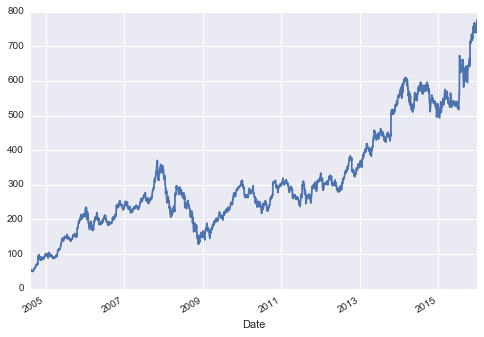

In [41]:
goog.plot()

## Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that **resample()** is fundamentally a data aggregation, while **asfreq()** is fundamentally a data selection.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of the business year.

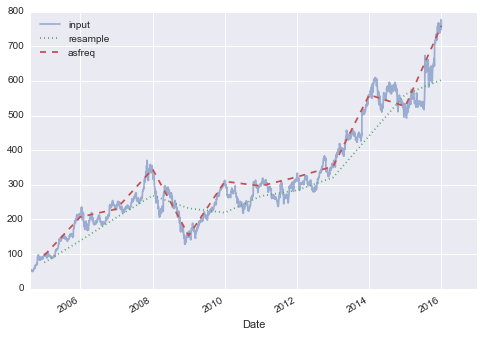

In [42]:
goog.plot(alpha=.5, style='-') # add the - tic 
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
          loc='upper left');

Notice the difference: at each point, resample reports the average of the previous year, while asfreq reports the value at the end of the year.

For up-sampling, resample() and asfreq() are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the pd.fillna() function discussed previously, asfreq() accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends):

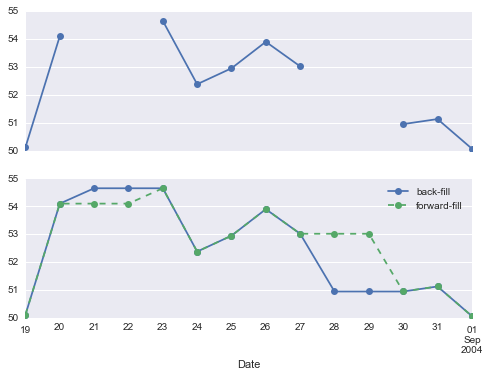

In [43]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o') #top plot

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') # blue backfill line
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') # Green dotted line
ax[1].legend(["back-fill", "forward-fill"]); # make legend

- The top panel is the default: non-business days are left as NA values and do not appear on the plot. 
- The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

## Time-shifts
Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.

Here we will both shift() and tshift() by 900 days;

ValueError: Freq was not given and was not set in the index

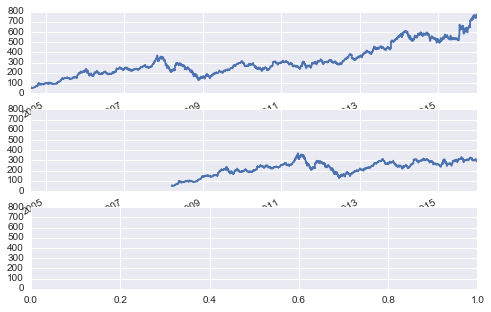

In [44]:
fig, ax = plt.subplots(3, sharey=True) # Make three blank subplots 

# apply a frequency to the data
#goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0]) #1st plot 
goog.shift(900).plot(ax=ax[1]) # 2nd plot
goog.tshift(900).plot(ax=ax[2]) # 3rd plot

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

# 1st plot 
ax[0].legend(['input'], loc=2) #makes legend in top left
ax[0].get_xticklabels()[2].set(weight='heavy', color='red') # colors 2008 in red
ax[0].axvline(local_max, alpha=0.3, color='red') # red vertical line 

# 2nd plot
ax[1].legend(['shift(900)'], loc=2) # Creates legend in top left
ax[1].get_xticklabels()[2].set(weight='heavy', color='red') # Colors 2008 in red
ax[1].axvline(local_max + offset, alpha=0.3, color='red') # red line after 2010 mark

# 3rd plot
ax[2].legend(['tshift(900)'], loc=2) # creates legend
ax[2].get_xticklabels()[1].set(weight='heavy', color='red') # colors 2008 in red
ax[2].axvline(local_max + offset, alpha=0.3, color='red'); # red line after 2010 mark

We see here that shift(900) shifts the data by 900 days, pushing some of it off the end of the graph (leaving NA values at the other end) while **tshift(900)** shifts the *index values* 900 days.

A common context for this type of shift is in computing differences over time. For example, we use shifited values to compute the one-year return on investment for Google Stock over the course of the dataset.

In [45]:
ROI = 100 * (goog.tshift(-365)/ goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

ValueError: Freq was not given and was not set in the index

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession.

## Rolling windows
Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via the **rolling()** attribute of Series and DataFrame objects, which returns a view similar to what we saw with the groupby operation (see Aggregation and Grouping). This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

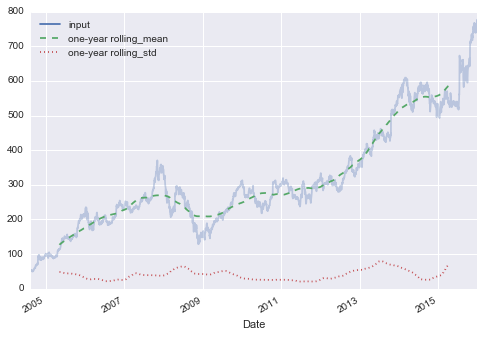

In [46]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(.3) # Makes the lines see through so it is easier to look at

# Example: Visualizing Seattle Bicycle Counts
As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the dataset.

As of summer 2016, the CSV can be downloaded as follows:

In [74]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=Download

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  463k    0  463k    0     0   185k      0 --:--:--  0:00:02 --:--:--  186k
100 1022k    0 1022k    0     0   292k      0 --:--:--  0:00:03 --:--:--  293k
100 1064k    0 1064k    0     0   301k      0 --:--:--  0:00:03 --:--:--  302k


In [47]:
import pandas as pd
import numpy as np
df = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
df.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


For convenience, we'll further process this dataset by shortening the column names and adding a "Total" column

In [53]:
df.columns = ['West', 'East']
df['Total'] = df.eval('West + East')


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

In [54]:
df.dropna().describe()

,West,East,Total
count,37961.000000,37961.000000,37961.000000
mean,54.381023,53.783067,108.164089
std,70.768407,77.835536,135.043302
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,66.000000,142.000000
max,698.000000,717.000000,957.000000


## Visualizing the Data
Let's visualize the data

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn; seaborn.set()

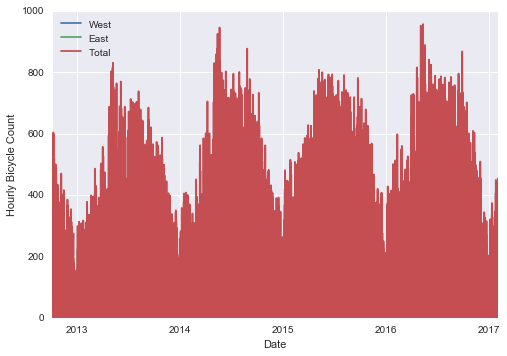

In [58]:
df.plot()
plt.ylabel('Hourly Bicycle Count');

Sometimes data is too complex for a simple graph to express what it really means. Let's start be resampling by week

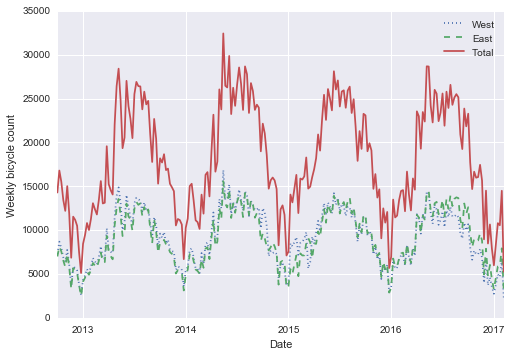

In [60]:
weekly = df.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

This shows us some interesting seasonal tresnds: as you might expect people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely the weather).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the **pd.rolling_mean()** function. Here we'll do a 30 day rolling mean of our data, making sure to center the window:

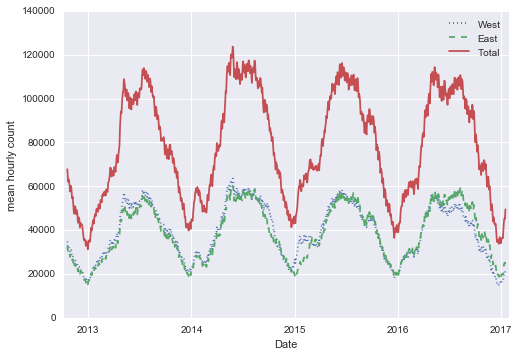

In [67]:
daily = df.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']) #make the graph with each respective tick
plt.ylabel('mean hourly count');

The sharp lines in the result lines is due to the hard cutoff of the window. We can get a smoother graph of a rolling mean using a windown function. We can use the Gaussian window. We are going to chose 50 days as the width of the window & the width of the Gaussian window will be 10 days.

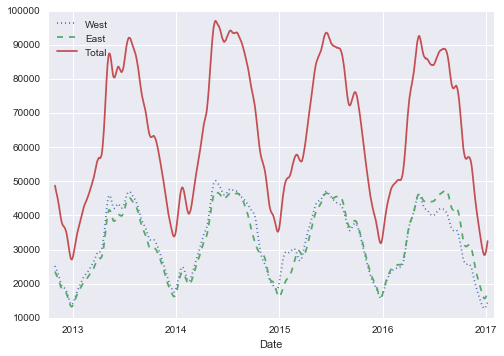

In [71]:
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);



Now we have a much more visually attractive plot.

# Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the **GroupBy** functionality.

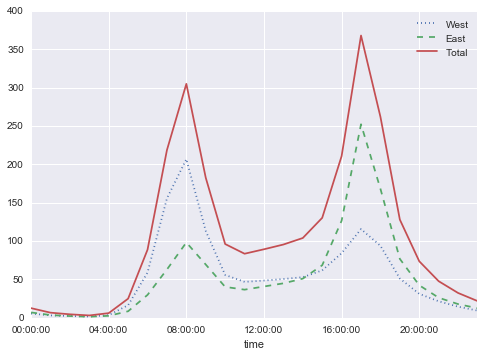

In [80]:
by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:


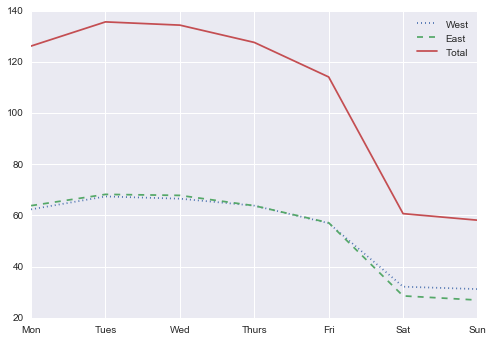

In [82]:
by_weekday = df.groupby(df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday though Friday than on Saturday and Sunday

With this in mind, ;et's do a compoun **GrouBy** and look at the hourly trend on weekdays versus weekends. We'll start by grouping by a both a glad marking the weekend, and time of day.

In [84]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df.groupby([weekend, df.index.time]).mean()

Now we'll use some of the Matplotlib tools


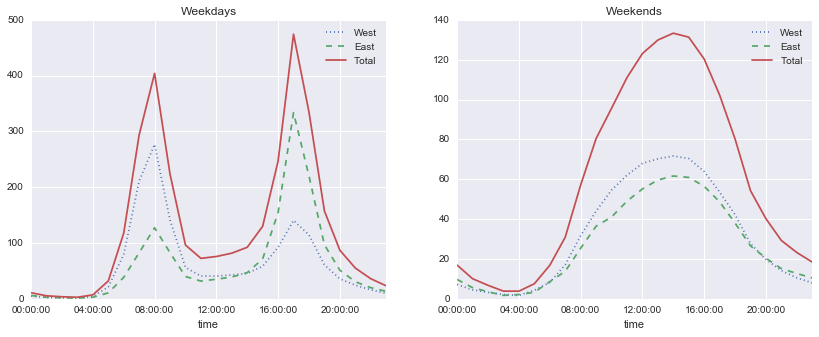

In [87]:
import matplotlib.pyplot as mpl
fig, ax = plt.subplots(1, 2, figsize=(14, 5)) # Make two ploys size 14 X 5
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--','-'])